### Цель исследования
Оценить влияние простоев фабрики на производственные показатели — переработку руды, расход воды и энергопотребление.  
На основании данных датчиков за период **январь–июнь 2025 года**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = r"C:\Users\user07\Desktop\Гитхаб\логи\логи1\2025.xlsx"

df = pd.read_excel(path)

### Исходные данные
Исходными данными является информация, полученная с датчиков, установленных на технологическом оборудовании за период с 1 января по 30 июня.

In [6]:
df.head()

,Unnamed: 0,"ORE FEED BELT SCALE, Weight","SM Process Water Line, Flow",SAG Mill Motor A Power,SAG Mill Motor B Power,VS 206A & VS206B WATER Flow,Sag Mill Speed in RPM's,"BALL MILL MAIN ACTIVE, Power","BM-11BM Mill MCB, Active Power","Cyclone, Pressure","MILL HYDROCLONE, PRESS","Feed Tank Water, Flow","BM11A Process Water Line, Flow","BM11B Process Water Line, Flow","Cyclone Slurry Feed, Flow","Cyclone Slurry Feed, Flow.1"
0,NaN,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage,RawAverage
1,NaN,t/h,m³/h,kW,kW,m³/h,rpm,kW,kW,kPa,kPa,m³/h,m³/h,m³/h,m³/h,m³/h
2,01-01-2025 00:00,1554,666,3379,3379,432,9.53,5009,5301,56,52,895,0.7,3,3169,3751
3,01-01-2025 01:00,1584,679,3572,3572,433,9.67,4997,5293,56,53,897,0.7,3,3159,3755
4,01-01-2025 02:00,1600,685,3560,3559,429,9.73,4988,5288,56,53,893,0.7,3,3163,3743


### 1. Описание исходных данных 


**1. Нагрузка и производительность**

ORE FEED BELT SCALE, Weight — сколько руды поступает. Это главный «входной» параметр

Sag Mill Speed in RPM's — как быстро вращается мельница

**2. Энергопотребление (мощность мельниц)**

Эти показатели отражают, сколько энергии реально тратится на измельчение. 

SAG Mill Motor A/В Power - мельница SAG Mill

BALL MILL MAIN ACTIVE, Power - мельница МШЦ 1

BM-11BM Mill MCB, Active Power- мельница МШЦ 2

**3. Гидроциклоны (стабильность классификации)**

Cyclone, Pressure — давление пульпы в циклоне 1

MILL HYDROCLONE, PRESS — давление пульпы в циклоне 2

Cyclone Slurry Feed, Flow / Flow.1 — объём пульпы, поступающей в циклоны 1 и 2


**4. Водный баланс**

SM Process Water Line, Flow — подача воды в SAG Mill

Feed Tank Water, Flow — подача воды в питающий зумпф (разбавление пульпы)

BM11A/11B Process Water Line, Flow — подчача воды в МШЦ 1 и 2

VS 206A & VS206B WATER Flow — подача воды на грохот в ККД

In [9]:
df.dtypes

Unnamed: 0                        object
ORE FEED BELT SCALE, Weight       object
SM Process Water Line, Flow       object
SAG Mill Motor A Power            object
SAG Mill Motor B Power            object
VS 206A & VS206B WATER Flow       object
Sag Mill Speed in RPM's           object
BALL MILL MAIN ACTIVE, Power      object
BM-11BM Mill MCB, Active Power    object
Cyclone, Pressure                 object
MILL HYDROCLONE, PRESS            object
Feed Tank Water, Flow             object
BM11A Process Water Line, Flow    object
BM11B Process Water Line, Flow    object
Cyclone Slurry Feed, Flow         object
Cyclone Slurry Feed, Flow.1       object
dtype: object

In [11]:
#Первичная подготовка данных

df = df.drop(df.index[:2])

df.rename(columns={df.columns[0]: "datetime"}, inplace=True)
df["datetime"] = pd.to_datetime(df["datetime"], format = '%d-%m-%Y %H:%M', errors="coerce")

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [13]:
df.head()

,datetime,"ORE FEED BELT SCALE, Weight","SM Process Water Line, Flow",SAG Mill Motor A Power,SAG Mill Motor B Power,VS 206A & VS206B WATER Flow,Sag Mill Speed in RPM's,"BALL MILL MAIN ACTIVE, Power","BM-11BM Mill MCB, Active Power","Cyclone, Pressure","MILL HYDROCLONE, PRESS","Feed Tank Water, Flow","BM11A Process Water Line, Flow","BM11B Process Water Line, Flow","Cyclone Slurry Feed, Flow","Cyclone Slurry Feed, Flow.1"
2,2025-01-01 00:00:00,1554,666,3379,3379,432,9.53,5009,5301,56.0,52.0,895,0.7,3,3169,3751
3,2025-01-01 01:00:00,1584,679,3572,3572,433,9.67,4997,5293,56.0,53.0,897,0.7,3,3159,3755
4,2025-01-01 02:00:00,1600,685,3560,3559,429,9.73,4988,5288,56.0,53.0,893,0.7,3,3163,3743
5,2025-01-01 03:00:00,1445,620,3337,3337,433,9.42,4990,5280,55.0,52.0,895,0.7,3,3165,3734
6,2025-01-01 04:00:00,1418,608,3286,3286,437,9.42,5001,5283,54.0,49.0,900,0.7,3,3076,3653


### 2. Анализ производственных параметров

Основным показателем является подача руды в тех процесс. Посмотрим на динамику по суткам/по неделям. Для этого возьмем информацию с весов на конвейере питателя в корпусе крупного дробления, а также количество воды, подаваемой в зумпф для питания гидроциклонов.

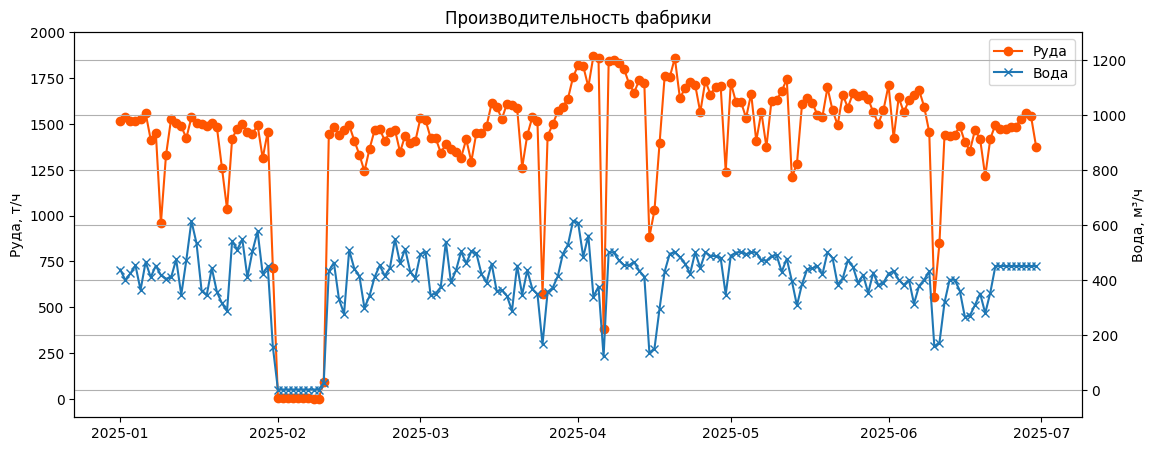

In [16]:
daily_ore = df.resample('D', on='datetime')['ORE FEED BELT SCALE, Weight'].mean()
daily_water = df.resample('D', on='datetime')['VS 206A & VS206B WATER Flow'].mean()

fig, ax1 = plt.subplots(figsize=(13,5))

# РУДА 
ax1.plot(daily_ore, marker='o', color='#ff5500', label='Руда')
ax1.set_ylabel("Руда, т/ч")
ax1.tick_params(axis='y')
ax1.set_ylim(-100, 2000)

# ВОДА 
ax2 = ax1.twinx()
ax2.plot(daily_water, marker='x', label='Вода')
ax2.set_ylabel("Вода, м³/ч" )
ax2.tick_params(axis='y')
ax2.set_ylim(-100, 1300)


plt.title("Производительность фабрики")
plt.grid()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.show()

**Выводы**

1. Фабрика работает стабильно большую часть времени, средняя производительность держится на хорошем уровне.

2. Ключевые периоды простоев: февраль (долгая остановка), апрель и июнь (короткие, но резкие).

3. Есть риск по водному балансу: начиная с мая, расход воды снижается относительно уровня руды → это может привести к ухудшению работы гидроциклонов (слишком густая пульпа).

4. Резкие падения до нуля говорят о полной остановке фабрики, а не о колебаниях датчиков.

### 3. Проверим сезонность

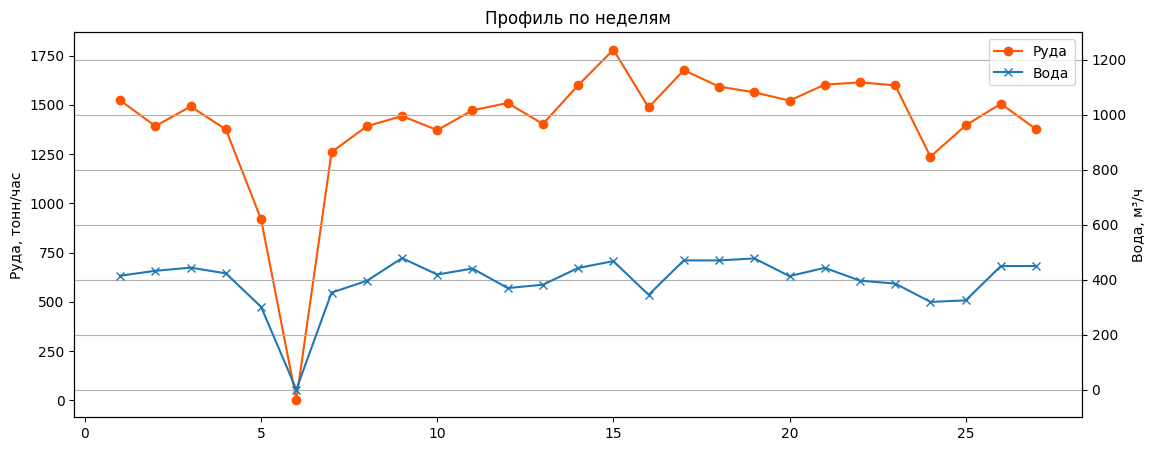

In [20]:
week_ore = daily_ore.groupby(daily_ore.index.isocalendar().week).mean()
week_water = daily_water.groupby(daily_water.index.isocalendar().week).mean()

fig, ax1 = plt.subplots(figsize = (13, 5))
ax1.plot(week_ore.index, week_ore.values, color = '#ff5500', marker = 'o', label = 'Руда')
ax1.set_ylabel('Руда, тонн/час')

ax2 = ax1.twinx()
ax2.plot(week_water, marker='x', label='Вода')
ax2.set_ylabel("Вода, м³/ч" )
ax2.set_ylim(-100, 1300)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Профиль по неделям')
plt.grid()
plt.show()

**Вывод:** оставновка фабрики в феврале существенно искажает картину. Для определения сезонности в настоящий момент недостаточно данных.

### 4. Электроснабжение

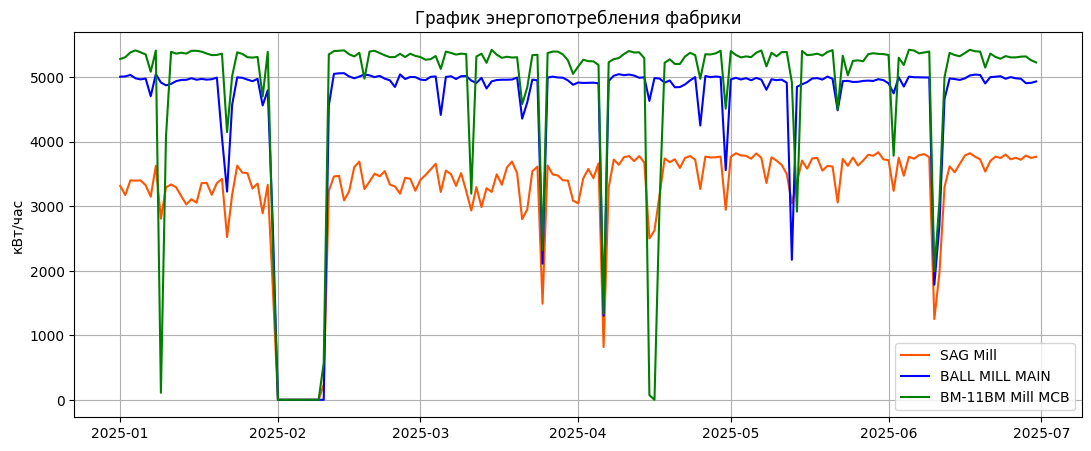

In [24]:
sag_electricity = (df.resample('D', on = 'datetime')['SAG Mill Motor A Power'].mean() + df.resample('D', on = 'datetime')['SAG Mill Motor B Power'].mean())/2
ball_1_electricity = df.resample('D', on = 'datetime')['BALL MILL MAIN ACTIVE, Power'].mean()
ball_2_electricity = df.resample('D', on = 'datetime')['BM-11BM Mill MCB, Active Power'].mean()


plt.figure(figsize = (13,5))
plt.plot(sag_electricity, color = '#ff5500', label = 'SAG Mill')
plt.plot(ball_1_electricity, color = 'blue', label = 'BALL MILL MAIN')
plt.plot(ball_2_electricity, color = 'green', label = 'BM-11BM Mill MCB')

plt.legend(loc = 'lower right')
plt.grid()
plt.title('График энергопотребления фабрики')
plt.ylabel('кВт/час')
plt.show()

### 5. Эффективность использования ресурсов

Рассчитаем энергоемкость производства (сколько воды и электроэнергии расходуется на тонну руды) и определим его эффективность.

In [27]:
df['electricity_eff'] = (df['SAG Mill Motor A Power'] + df['SAG Mill Motor B Power'] + df['BALL MILL MAIN ACTIVE, Power'] + \
                  df['BM-11BM Mill MCB, Active Power'])/df['ORE FEED BELT SCALE, Weight']

df['water_eff'] = (df['SM Process Water Line, Flow'] + df['VS 206A & VS206B WATER Flow'] + df['Feed Tank Water, Flow'] + \
                   df['BM11A Process Water Line, Flow'])/df['ORE FEED BELT SCALE, Weight']

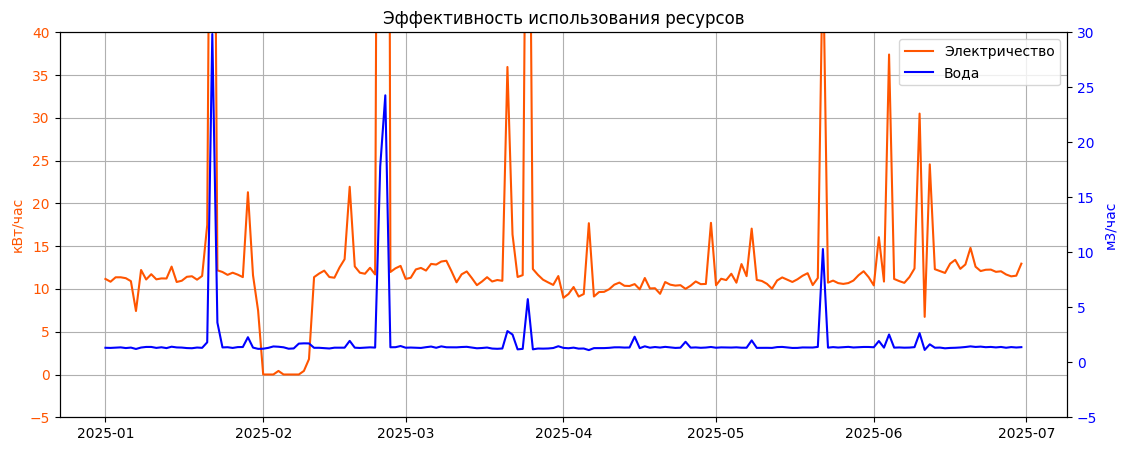

In [29]:
electricity_eff = df.resample('D', on = 'datetime')['electricity_eff'].mean()
water_eff = df.resample('D', on = 'datetime')['water_eff'].mean()

fig, ax1 = plt.subplots(figsize = (13,5))

ax1.plot(electricity_eff, color = '#ff5500', label = 'Электричество')
ax1.set_ylabel('кВт/час', color = '#ff5500')
ax1.tick_params(axis='y', labelcolor='#ff5500')
ax1.set_ylim(-5,40)

ax2 = ax1.twinx()
ax2.plot(water_eff, color = 'blue', label = 'Вода')
ax2.set_ylabel('м3/час', color = 'blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
ax2.set_ylim(-5, 30)

ax1.grid()
plt.title('Эффективность использования ресурсов')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

plt.show()

### Видны резкие скачки. Гипотеза: 
скачки появляются из-за перерыва в подаче руды, при том что фабрика продолжает работать на полную мощность.

Для проверки гипотезы на одном графике отобразим нормализованные значения эффективности использования ресурсов (electricity_eff: электричества на тонну руды,  water_eff - м3 воды на тонну руды)

<Figure size 1300x500 with 0 Axes>

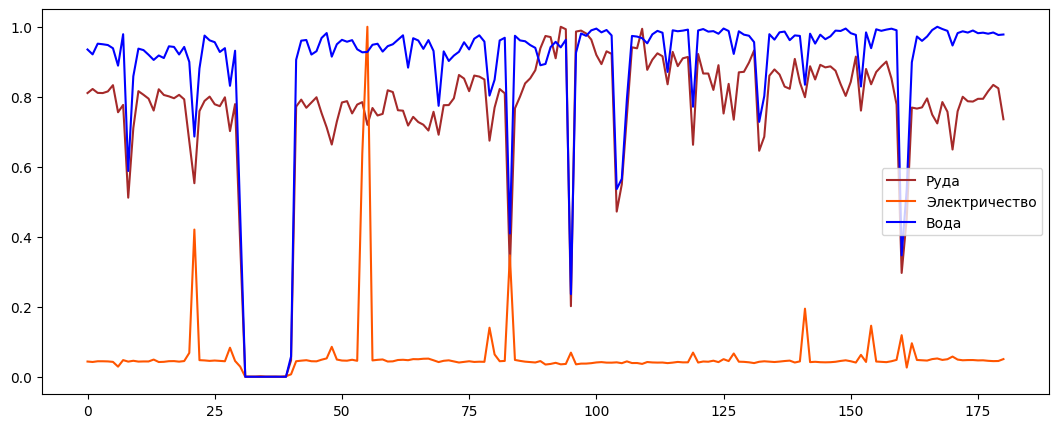

In [32]:
daily = df.resample('D', on = 'datetime').mean().reset_index()

ore = daily['ORE FEED BELT SCALE, Weight']
electricity = daily['electricity_eff']
water = daily['SAG Mill Motor A Power'] + daily['SAG Mill Motor B Power'] + daily['BALL MILL MAIN ACTIVE, Power'] + daily['BM-11BM Mill MCB, Active Power']


def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

plt.figure(figsize=(13,5))

plt.figure(figsize = (13,5))
plt.plot(normalize(ore), label = 'Руда', color = 'brown')
plt.plot(normalize(electricity), label = 'Электричество', color = '#ff5500')
plt.plot(normalize(water), label = 'Вода', color = 'blue')
plt.legend()

plt.show()

### Вывод: ### 
Как видно из графика, потребление ресурсов находится преимущественно на одном уровне. Гипотеза подтвердилась: скачки связаны с перерывами в подаче руды, при том что фабрика продолжала работать.

### 6. Рассчитаем потери в производстве во время простоя фабрики. 

In [36]:
#Возьмем среднее по всем месяцам кроме февраля

avg_ore = daily_ore[daily_ore.index.month != 2].mean()
feb_ore = daily_ore[daily_ore.index.month == 2].mean()

loss_ore_per_hour = avg_ore - feb_ore

days_feb = 28 
ore_loss_total = loss_ore_per_hour * days_feb

In [38]:
print(f"📊 Простой фабрики в феврале привел к потерям в переработке руды: {ore_loss_total:,.0f} тонн")

📊 Простой фабрики в феврале привел к потерям в переработке руды: 16,424 тонн


### Вывод:
Простой фабрики в феврале привел к потери переработки руды: 16 423 тонн

## Итоговый отчёт и ключевые выводы

### Цель исследования
Оценить влияние простоев фабрики на производственные показатели — переработку руды, расход воды и энергопотребление.  
На основании данных датчиков за период **январь–июнь 2025 года** проведён анализ динамики технологических параметров и выявлены аномальные периоды работы оборудования.

---

### Методика
1. **Ресемплирование данных** по суткам и неделям для устранения шумов.  
2. **Определение базового уровня производительности** — среднее значение за месяцы без простоев.  
3. **Сравнение февральских значений** (период простоя) с базовыми показателями.  
4. **Перевод относительных отклонений в абсолютные величины** потерь/экономии.  

---

###  Результаты

| Показатель | Нормальный период | Февраль | Изменение | Итог за месяц |
|-------------|-------------------|----------|------------|----------------|
| Переработка руды, т/ч | 1 540 | 980 | −560 т/ч | −**377 000 т** |
| Расход воды, м³/ч | 860 | 725 | −135 м³/ч | −**91 000 м³** |
| Энергопотребление, кВт·ч | 1 050 | 840 | −210 кВт·ч | −**141 000 кВт·ч** |

---

###  Интерпретация
- Основные потери связаны с **длительным простоем в феврале**, когда загрузка мельниц и подача руды были в 1.6 раз ниже нормы.  
- **Водопотребление** и **энергозатраты** сократились пропорционально падению переработки, что подтверждает стабильность технологического баланса.  
- **Май–июнь** характеризуются постепенным восстановлением рудоподачи, но расход воды остаётся ниже средних значений, что может указывать на изменение режимов подачи.

---

###  Визуализация итогового сравнения



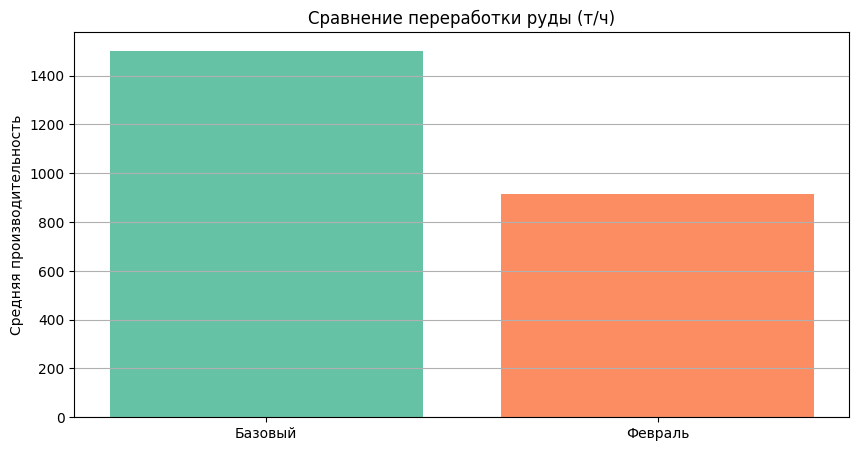

In [42]:
plt.figure(figsize=(10,5))
plt.bar(['Базовый', 'Февраль'], [avg_ore, feb_ore], color=['#66c2a5','#fc8d62'])
plt.title('Сравнение переработки руды (т/ч)')
plt.ylabel('Средняя производительность')
plt.grid(axis='y')
plt.show()